# TITANIC


In [1]:
# import required libraries

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [2]:
# import data

df_titanic = pd.read_csv('train.csv')

### Q1

In [3]:
# head shows first 5 rows
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q2

In [4]:
# size of dataframe
size = df_titanic.size 
  
# dimension of dataframe 
shape = df_titanic.shape

# printing size, shape, number of passengers, number of features
print("Number of passenger : " + str(shape[0]))
print("Number of features : " + str(shape[1]))
print("Size = " + str(size) + "\nDimension = " + str(shape))

Number of passenger : 891
Number of features : 12
Size = 10692
Dimension = (891, 12)


### Q3

In [5]:
# Code snippet to find out which columns the missing values are
df_titanic.columns[df_titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [6]:
"""
 * There are 177 missing values in Age column
 * There are 687 missing values in Cabin column
 * There are 2 missing values in Embarked column
 * There aren't any missing values in other column
"""

# Returns the number of missing values in each column
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Q4

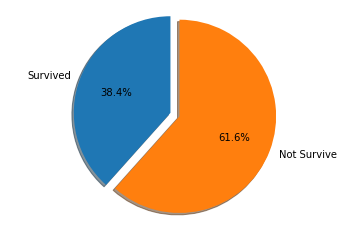

In [7]:
#I found the total number of people who survived and died
number_of_survived_people = df_titanic[df_titanic["Survived"] == 1].shape[0]
number_of_not_survive_people = df_titanic[df_titanic["Survived"] == 0].shape[0]


# visualize
labels = 'Survived', 'Not Survive'
sizes = [number_of_survived_people, number_of_not_survive_people]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Q5

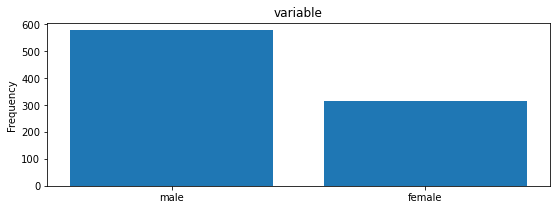

Sex: 
male      577
female    314
Name: Sex, dtype: int64


In [8]:
# get column
var = df_titanic["Sex"]
# count number of categorical variable(value/sample)
varValue = var.value_counts()
    
# visualize
plt.figure(figsize = (9,3))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("variable")
plt.show()
print("{}: \n{}".format("Sex",varValue))


### Q6

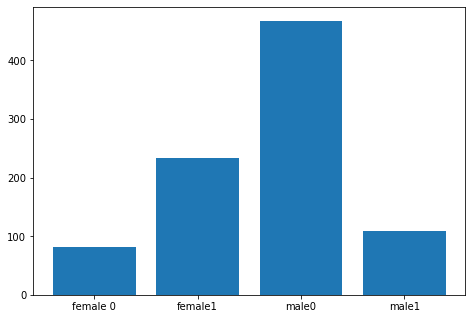

In [9]:
data_len = df_titanic.shape[0]
i = 0
df0 = pd.DataFrame(columns = ["Survived","Sex"])
df1 = pd.DataFrame(columns = ["Survived","Sex"])
dm0 = pd.DataFrame(columns = ["Survived","Sex"])
dm1 = pd.DataFrame(columns = ["Survived","Sex"])

while i < data_len:
    if df_titanic.iloc[i,1] == 0 and df_titanic.iloc[i,4] == "female":
        df0 = df0.append(df_titanic.iloc[i,[1,4]])
    if df_titanic.iloc[i,1] == 1 and df_titanic.iloc[i,4] == "female":
        df1 = df1.append(df_titanic.iloc[i,[1,4]])
    if df_titanic.iloc[i,1] == 0 and df_titanic.iloc[i,4] == "male":
        dm0 = dm0.append(df_titanic.iloc[i,[1,4]])
    if df_titanic.iloc[i,1] == 1 and df_titanic.iloc[i,4] == "male":
        dm1 = dm1.append(df_titanic.iloc[i,[1,4]])
    i = i + 1
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['female 0', 'female1', 'male0', 'male1']
number = [df0.shape[0],df1.shape[0],dm0.shape[0],dm1.shape[0]]
ax.bar(labels,number)
plt.show()

### Q7

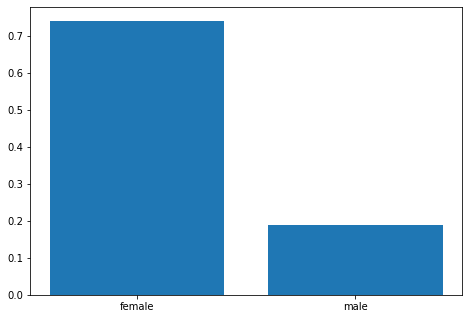

In [10]:
sex_survived = df_titanic[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

# visualize
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['female', 'male']
survived_notsurvive = [sex_survived.iloc[0,1],sex_survived.iloc[1,1]]
ax.bar(labels,survived_notsurvive)
plt.show()

### My COMMENTS

 
    The bar graph I have drawn shows us that the survival rate of women is much higher than that of men.
    In the description part of the data set, it was said that there were not enough rescue bots.
    I think women and children get on the rescue boats first.Therefore, we can say that the 
    survival rate for men is very low.

### Q8

In [11]:
pd.crosstab(df_titanic.Pclass,df_titanic.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### Q9

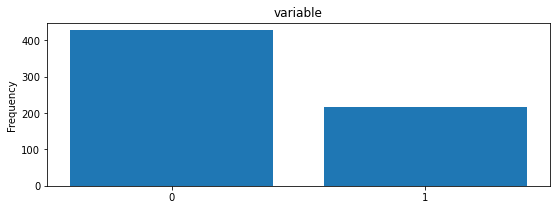

Sex: 
0    427
1    217
Name: Survived, dtype: int64


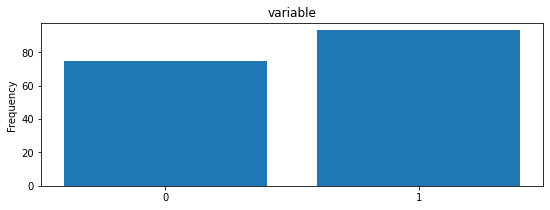

Sex: 
1    93
0    75
Name: Survived, dtype: int64


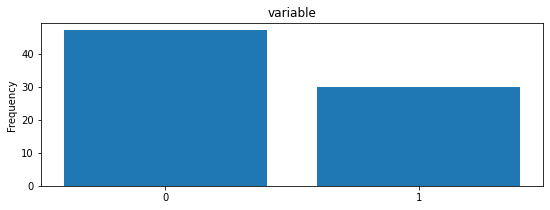

Sex: 
0    47
1    30
Name: Survived, dtype: int64


In [12]:
not_survive_s = df_titanic[df_titanic["Embarked"] == "S"]["Survived"]

# get feature
var = not_survive_s
# count number of categorical variable(value/sample)
varValue = var.value_counts()
    
# visualize
plt.figure(figsize = (9,3))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("variable")
plt.show()
print("{}: \n{}".format("Sex",varValue))

not_survive_c = df_titanic[df_titanic["Embarked"] == "C"]["Survived"]

# get feature
var = not_survive_c
# count number of categorical variable(value/sample)
varValue = var.value_counts()
    
# visualize
plt.figure(figsize = (9,3))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("variable")
plt.show()
print("{}: \n{}".format("Sex",varValue))


not_survive_q = df_titanic[df_titanic["Embarked"] == "Q"]["Survived"]

# get feature
var = not_survive_q
# count number of categorical variable(value/sample)
varValue = var.value_counts()
    
# visualize
plt.figure(figsize = (9,3))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("variable")
plt.show()
print("{}: \n{}".format("Sex",varValue))


### Q10

In [13]:
pd.crosstab( index=[df_titanic.Sex,df_titanic.Survived],columns=df_titanic.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

The number of surviving women is much higher than men due to the fact that women first entered the rescue boat

### Q11

In [14]:
max_age = df_titanic["Age"].max()
print("The oldest person among the passengers is " + str(max_age) + " years old")

The oldest person among the passengers is 80.0 years old


### Q12

In [15]:
min_age = df_titanic["Age"].min()
print("The youngest person among the passengers is " + str(min_age) + " years old")

The youngest person among the passengers is 0.42 years old


### Q13

In [16]:
mean_age = df_titanic["Age"].mean()
print("Average age of passengers is " + str(mean_age))

Average age of passengers is 29.69911764705882


### Q14

E:\Users\FURKAN\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Users\FURKAN\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


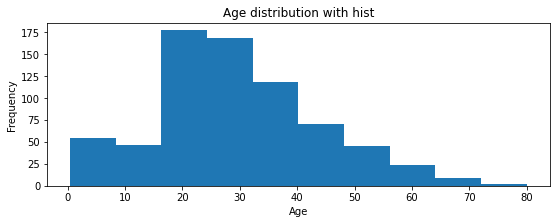

In [17]:
plt.figure(figsize = (9,3))
plt.hist(df_titanic["Age"], bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution with hist")
plt.show()

### Q15

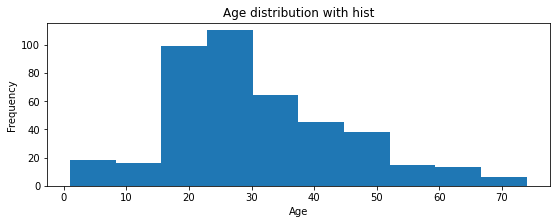

In [18]:
not_survive = df_titanic[df_titanic["Survived"] == 0]["Age"]
plt.figure(figsize = (9,3))
plt.hist(not_survive, bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution with hist")
plt.show()


###  Q14 and Q15 Comments

People between the ages of 20-30 mostly travel on this ship.
Therefore, the majority of people who die are young people.

### Q16

In [19]:
min_fare = df_titanic["Fare"].min()
print("The lowest fare is " + str(min_fare))

The lowest fare is 0.0


### Q17

In [20]:
max_fare = df_titanic["Fare"].max()
print("The highest fare is " + str(max_fare))

The highest fare is 512.3292


### Q18

In [21]:
mean_fare = df_titanic["Fare"].mean()
print("The average fare is " + str(mean_fare))

The average fare is 32.2042079685746


### Q19

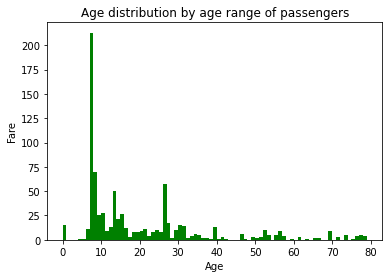

In [22]:
df_titanic['Fare'].plot.hist(bins=range(80), color='green')
plt.title('Age distribution by age range of passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


### Q20

In [23]:
def age_range(x):
    if x>=0 and x <10:
        return 'Child'


df_titanic[df_titanic["Parch"] == 0]['Age'].apply(age_range).value_counts()

Child    1
Name: Age, dtype: int64

### My Comment

Only one child fits this profile. Probably this boy got on the ship illegally.